# Caroline Barte
# Final Project Step 3

# Step 1

## Narrative 

    For my final project, I am evaluating Walmart sales using a Kaggle dataset. My dataset can be downloaded here: https://www.kaggle.com/datasets/mikhail1681/walmart-sales. There are 8 total columns in this dataset, all which contain information about a specific store. Each row represents store data taken each week. There are 6435 total rows in the dataset, all which were collected over the span of 2 years.
   
    There are multiple variables which will be used in my analysis. My dependent variable in this project will be store ‘success’, or total revenue generated by the store. To begin, I will be exploring which factors have the highest contribution to a store’s revenue. Some of the independent variables featured in this dataset are regional fuel cost, store location, and regional unemployment rate. I will be testing them all to find the most influential on revenue. In addition to this analysis, I am planning to create a logistic regression model which will predict the revenue a store will make based on the top contributing variables. 
   
    The target of my project is to create a model which will predict store revenue, which will save Walmart time and money in the long run. The model can be used to compare different locations to see which location would generate more revenue. In addition to this model being used by Walmart, competitors could use this model to build stores in the most ideal location before Walmart does. By creating this model, it can easily be catered to the datasets of other stores, which makes it incredibly beneficial to the retail industry. 


## Importing the data set

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [47]:
df = pd.read_csv("Walmart_Sales.csv")

In [48]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [49]:
# Print the columns to find the independent variables
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [50]:
# Print the dimensions of the dataframe.
df.shape

(6435, 8)

In [51]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [52]:
dates = (df['Date'])
sales = df['Weekly_Sales']
unemployment = df['Unemployment']
temperature = df['Temperature']
fuel = df['Fuel_Price']

Observations: 

1. The dataset has 6435 data points
2. All the columns will be useful in the analysis
3. The target of the model is the 'weekly_sales' category

## Graph 1

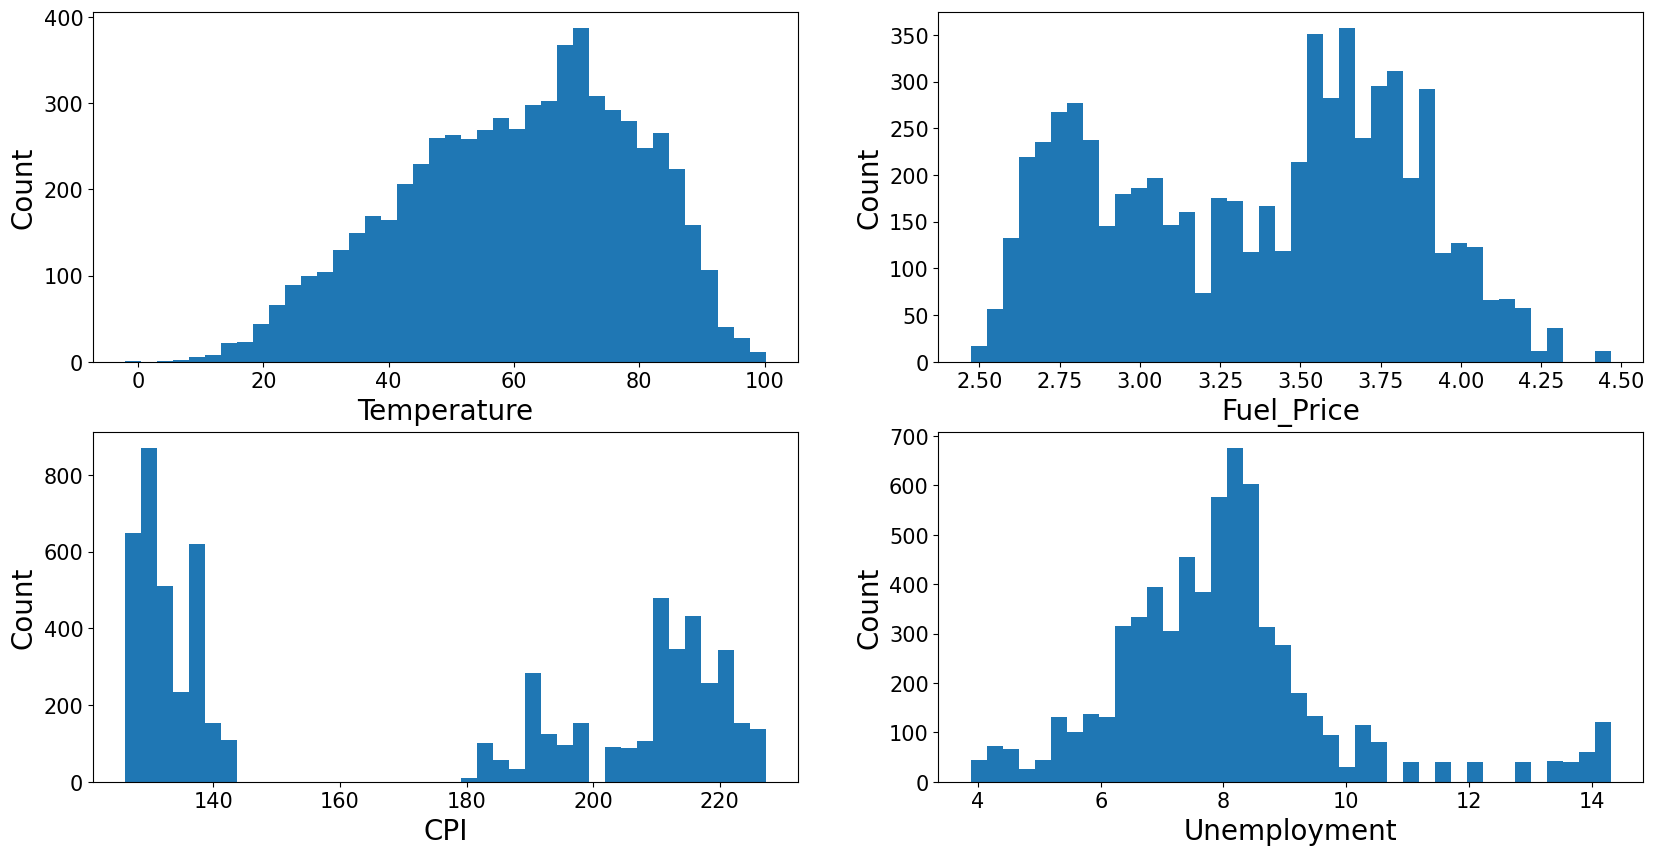

In [53]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, axes = plt.subplots(nrows = 2, ncols = 2)
num_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
xaxes = num_features
yaxes = ['Count', 'Count', 'Count', 'Count']
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

Observations: 
1. The average temperature is around 60-80 degrees. 
2. Fuel prices fluctuate, with the most average around 3.50-4.00
3. There is a gap in CPI, but the highest count of CPI is less than 150.
4. Unemployment percentage has the highest count around 8%.

## Graph 2

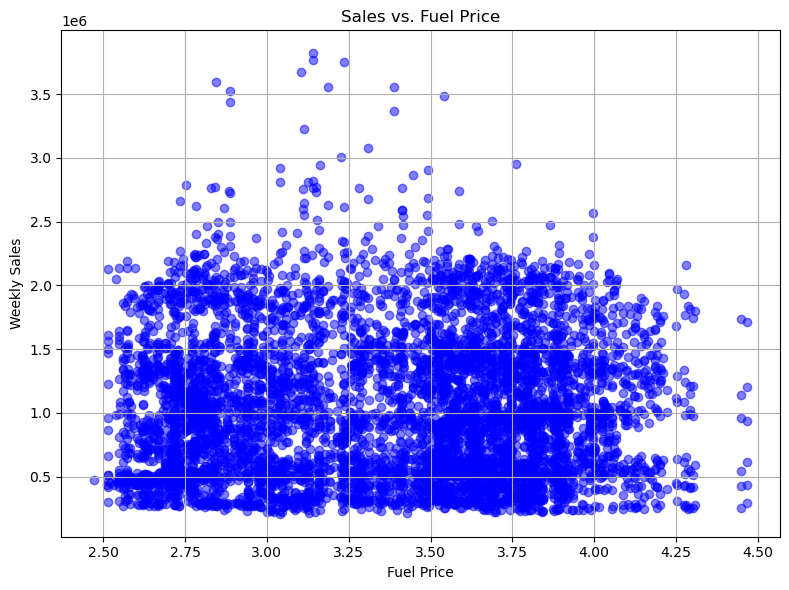

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Fuel_Price'], df['Weekly_Sales'], color='blue', alpha=0.5)
plt.title('Sales vs. Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

Observations
1. Higher fuel prices yielded a lower weekly sale
2. The highest weekly sales had an average fuel price (2.75-3.50)

## Graph 3

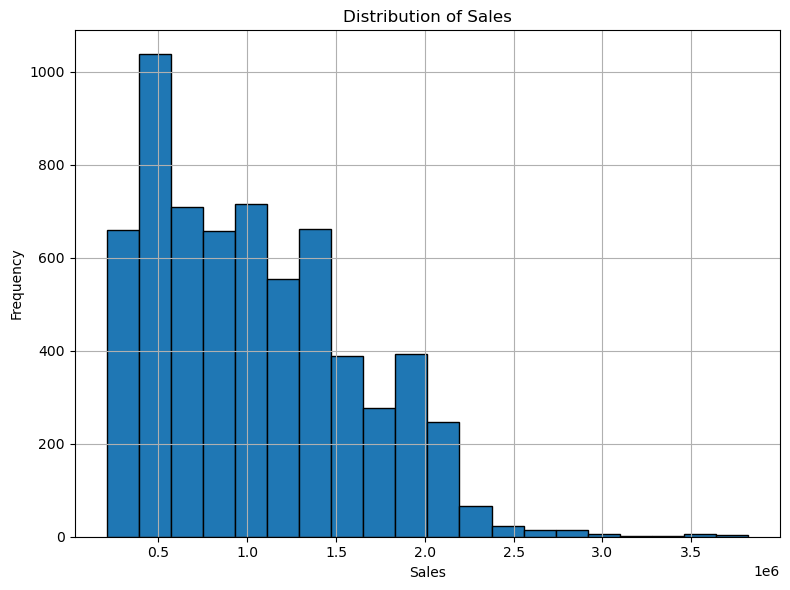

In [55]:
plt.figure(figsize=(8, 6))
plt.hist(df['Weekly_Sales'], bins=20, edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

Observations
1. Most of the sales were around 500,000 dollars
2. Not many sales are over 2.5 million dollars

## Graph 4

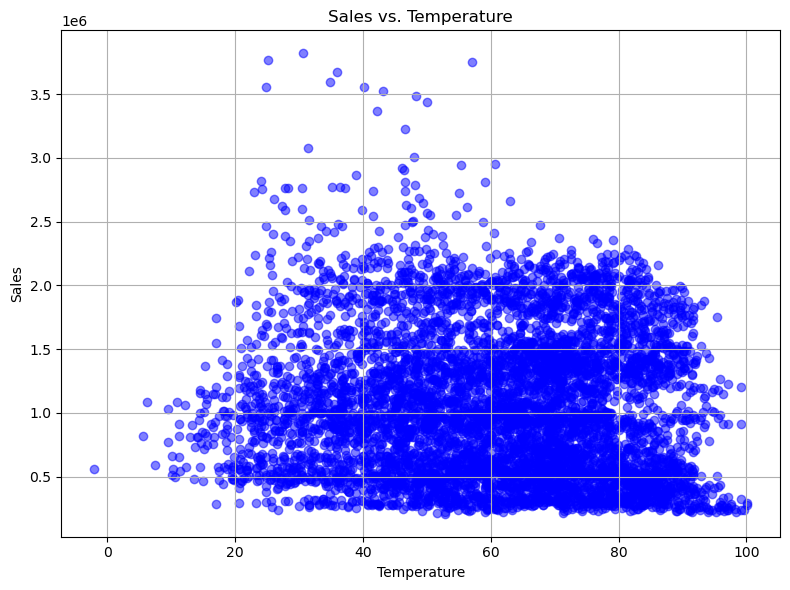

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Temperature'], df['Weekly_Sales'], color='blue', alpha=0.5)
plt.title('Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

Observations
1. The higher sales occured when the temperature was lower (20-60 degrees) 
2. As temperature increased, sales stayed relatively constant
3. Really hot temperatures did not yield better sales

## Graphical Analysis Conclusions

Most importantly, the graphical analysis confirmed relationships between some of my independent variables and how they affect sales price. For example, from the graphical analysis I know that fuel price and temperature both affect the total revenue generated by store. However, since these are just visual interpretations, I am planning on further backing this up with correlation matrices.

# Step 2

## Evaluating useful features

In [57]:
# As a reminder, I am going to import the first few columns of the data set.
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [58]:
# To make the dataset easier to analyze, I am going to change the names of the columns to one word names
colnames = {
    'Weekly_Sales': 'Sales',      # Rename 'Weekly_Sales' to 'Sales'
    'Holiday_Flag': 'Holiday', # Rename 'Holiday_Flag' to 'Is_Holiday'
    'Fuel_Price': 'Fuel'  # Rename 'Fuel_Price' to 'Price_per_Gallon'
}

df.rename(columns=colnames, inplace=True)

In [59]:
df.columns

Index(['Store', 'Date', 'Sales', 'Holiday', 'Temperature', 'Fuel', 'CPI',
       'Unemployment'],
      dtype='object')

For my analysis, I think all of these columns are useful. The only one which I may remove in the future is the holiday columnm but I will keep it for now. 

## Printing descriptive statistics

In [60]:
# Printing some basic statistics of the data
df.describe()

,Store,Sales,Holiday,Temperature,Fuel,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## Checking for null values

In [61]:
nullcount = df.isnull().sum()

In [62]:
nullcount

Store           0
Date            0
Sales           0
Holiday         0
Temperature     0
Fuel            0
CPI             0
Unemployment    0
dtype: int64

As shown, there are 0 entry columns with null values. If there were null values, I would fill them in. 

## Formatting Date

In [63]:
# I want to separate the dates of the entries by day, month, and year.
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [64]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.dayofweek

In [65]:
df.columns

Index(['Store', 'Date', 'Sales', 'Holiday', 'Temperature', 'Fuel', 'CPI',
       'Unemployment', 'Year', 'Month', 'DayOfWeek'],
      dtype='object')

In [66]:
# If all data entries take place in the same year, I will remove the year column.

In [67]:
df['Year'].unique()

array([2010, 2011, 2012])

In [68]:
# I am not going to remove the year column. However, I am also going to split the dates into their respective quarters. 

In [69]:
df['Quarter'] = df['Date'].dt.quarter

In [70]:
df.head(5)

,Store,Date,Sales,Holiday,Temperature,Fuel,CPI,Unemployment,Year,Month,DayOfWeek,Quarter
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,4,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,4,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,4,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4,1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,4,1


## Step 2 Thoughts

    By completing step 2 of my final project, I believe my dataset is ready for analysis. I evaluated column names, calculated basic statistics, checked for null values, created dummy variables, and formatted the date. 
   
    In my opinion, I think the most useful transformation I did on my data was the formatting of the date. By splitting the dates up, I can evaulate the data by months instead of looking at each individual day. By categorizing the days, I can analyze which stores do better on specific days (like weekends). I also split the months into seasons or quarters to draw conclusions from there. My data is well prepared for the model building process.

# Step 3

## Narrative

To understand the relationship between factors such as 'holiday' 'temperature' 'day of week' and 'CPI' and their impact on total store revenue, I am going to use a linear regression. This way I can easily evaluate coefficients and see how they affect sales. I think this is the most straightforward way to evaluate my project. Also with linear regression, it can predict future sales for forecasting. 

## Model 1

In [71]:
# Imports 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [72]:
# Although I checked for null values before, I am doing so again
df.isnull().sum()
df = df.dropna()

In [73]:
# Define features and target
X = df[['Holiday', 'Temperature', 'DayOfWeek', 'CPI']]
y = df['Sales']

In [74]:
# Since these values are both categorical and numerical, I am going to transform them
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Holiday', 'DayOfWeek']),
        ('num', 'passthrough', ['Temperature', 'CPI'])
    ])

In [75]:
# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [76]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Holiday', 'DayOfWeek']),
                                                 ('num', 'passthrough',
                                                  ['Temperature', 'CPI'])])),
                ('regressor', LinearRegression())])

In [78]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [79]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [80]:
mse

319408356498.9321

In [81]:
r2

0.008524504806949773

## Findings

The MSE value for my dataset is quite large, which shows that the target variable has a large range and also has a larger squared error between predicted and actual values. It shows that the model has incredibly poor performance when predicting sales. I think a different model would be more beneficial. 

Since my R-squared value is low, this shows that the model does not explain much of the variance in the target variable. It shows that the model does not fit the data well.

## Model 2

Since the first model performed poorly, I am going to also make a decision tree to see if it analyzes the data better. 

In [82]:
df.columns

Index(['Store', 'Date', 'Sales', 'Holiday', 'Temperature', 'Fuel', 'CPI',
       'Unemployment', 'Year', 'Month', 'DayOfWeek', 'Quarter'],
      dtype='object')

In [85]:
# Define features and target variable
X = df[['Holiday', 'Temperature', 'Date', 'CPI']]
y = df['Sales']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Holiday', 'Date']),
        ('num', 'passthrough', ['Temperature', 'CPI'])
    ])

In [92]:
from sklearn.tree import DecisionTreeRegressor

In [93]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

In [94]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Holiday', 'Date']),
                                                 ('num', 'passthrough',
                                                  ['Temperature', 'CPI'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [95]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [96]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 648964074010.5167
R-squared: -1.014449414206943


## Findings